--- Analysis and Simulation ---

A = 0.800, B = -1.800
  Stationary point: (0.800, -2.250)
  Tr = -3.440, D(λ) = 9.274
  Type: Node, Stability: Stable

A = 1.000, B = 0.000
  Stationary point: (1.000, 0.000)
  Tr = -2.000, D(λ) = 0.000
  Type: Degenerate Node (Crit.), Stability: Stable

A = 1.150, B = 1.350
  Stationary point: (1.150, 1.174)
  Tr = -0.973, D(λ) = -4.344
  Type: Focus, Stability: Stable

A = 1.298, B = 2.682
  Stationary point: (1.298, 2.066)
  Tr = -0.003, D(λ) = -6.739
  Type: Focus, Stability: Stable

A = 1.500, B = 4.500
  Stationary point: (1.500, 3.000)
  Tr = 1.250, D(λ) = -7.438
  Type: Focus, Stability: Unstable

A = 2.000, B = 9.000
  Stationary point: (2.000, 4.500)
  Tr = 4.000, D(λ) = 0.000
  Type: Degenerate Node (Crit.), Stability: Unstable

A = 3.500, B = 22.500
  Stationary point: (3.500, 6.429)
  Tr = 9.250, D(λ) = 36.562
  Type: Node, Stability: Unstable

A = 5.000, B = 36.000
  Stationary point: (5.000, 7.200)
  Tr = 10.000, D(λ) = 0.000
  Type: Dege

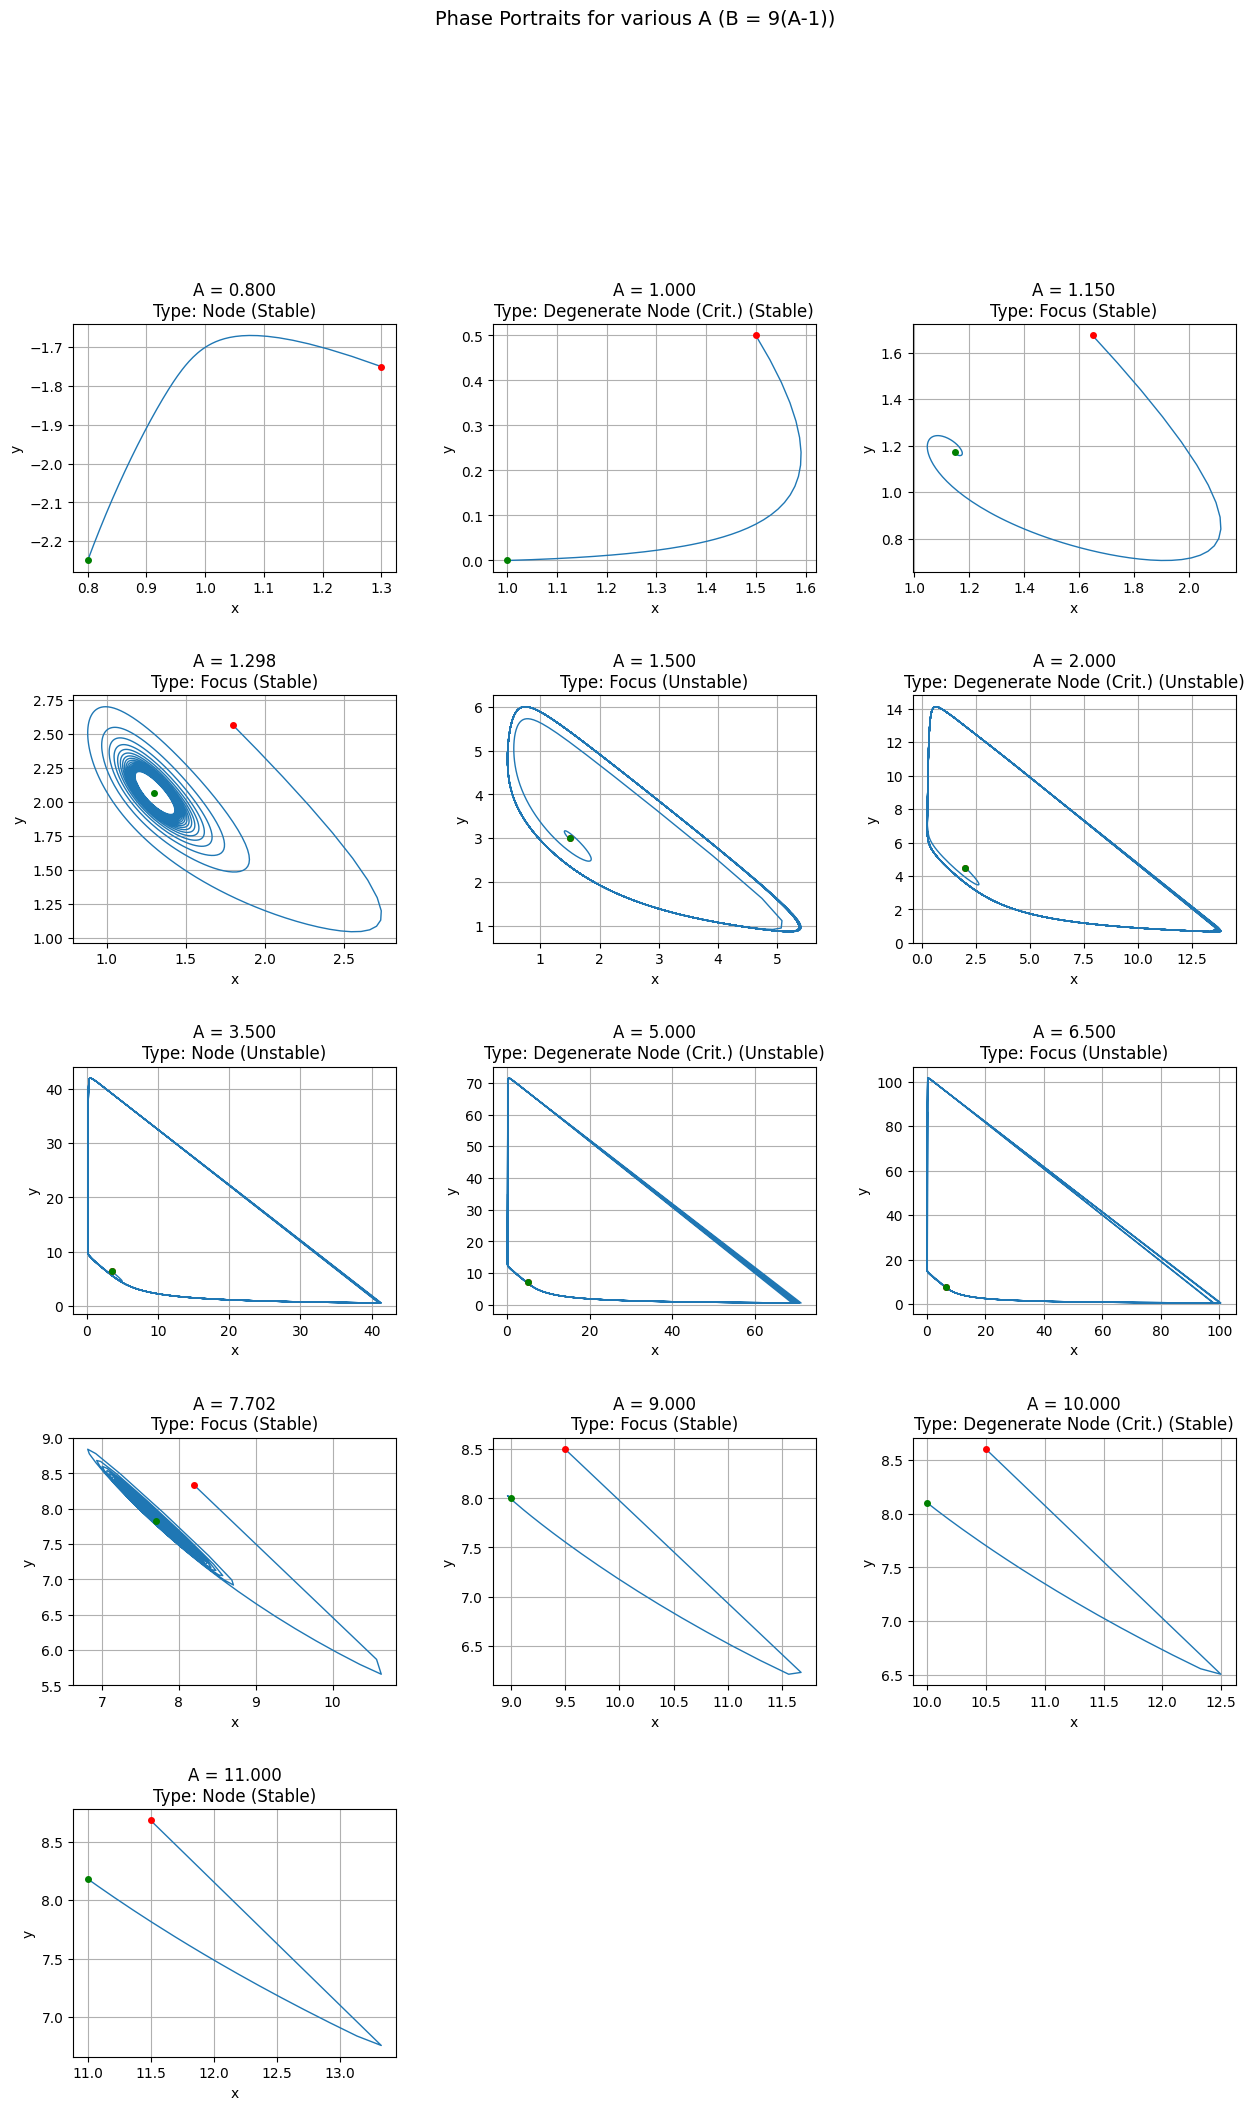

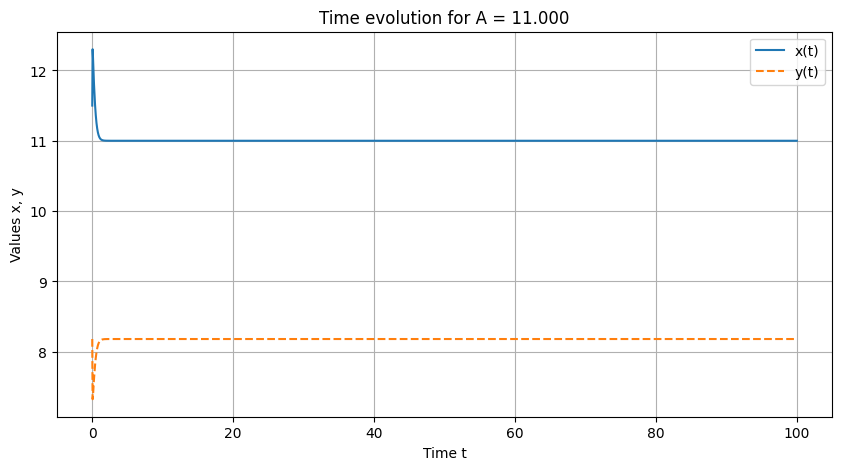

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# --- Parameters and Functions ---

# Dependence of B on A
def calculate_B(A):
    return 9 * (A - 1) # Given condition

# Brusselator system of equations
def brusselator(t, state, A, B):
    x, y = state
    dxdt = A - (B + 1) * x + x**2 * y
    dydt = B * x - x**2 * y
    return [dxdt, dydt]

# Stationary point
def get_stationary_point(A, B):
    if A == 0: # Avoid division by zero, although A > 0 by condition
        return (0, 0) # Not a physical point for A > 0
    x0 = A
    y0 = B / A
    return (x0, y0)

# Stability analysis (for annotations on plots)
def analyze_stability(A, B):
    # Recalculate A_h1, A_h2 just in case
    delta_h = 81 - 40 # 9*9 - 4*1*10
    if delta_h < 0: # Should not happen for B=9(A-1)
       Ah1, Ah2 = -1, -1 # Error
    else:
       Ah1 = (9 - np.sqrt(delta_h)) / 2
       Ah2 = (9 + np.sqrt(delta_h)) / 2

    Tr = -A**2 + 9*A - 10
    Det = A**2 # Always > 0 for A > 0
    D_lambda = Tr**2 - 4*Det

    stability = ""
    point_type = ""

    # Determining stability
    if np.isclose(Tr, 0):
        stability = "Neutral (Hopf)"
    elif Tr < 0:
        stability = "Stable"
    else:
        stability = "Unstable"

    # Determining point type
    if np.isclose(D_lambda, 0):
        point_type = "Degenerate Node"
        # Specify critical points A=1, 2, 5, 10
        if np.isclose(A, 1) or np.isclose(A, 2) or np.isclose(A, 5) or np.isclose(A, 10):
             point_type = "Degenerate Node (Crit.)"
        # Specify Hopf points
        if np.isclose(A, Ah1) or np.isclose(A, Ah2):
             point_type = "Center (Hopf)" # Technically D<0 at these points, but Tr=0 is more important
             stability = "Neutral (Hopf)"
        # else:
            # There should be no other points with D=0 and Tr!=0

    elif D_lambda < 0:
        point_type = "Focus"
         # Specify Hopf points (where Tr=0, D<0)
        if np.isclose(A, Ah1) or np.isclose(A, Ah2):
             point_type = "Center (Hopf)"
             stability = "Neutral (Hopf)"

    else: # D_lambda > 0
        point_type = "Node"

    return stability, point_type, Tr, D_lambda, Ah1, Ah2


# --- Simulation Scenarios ---
# Select A values to show different regimes and transitions
# Approximate boundaries: 1, Ah1≈1.3, 2, 5, Ah2≈7.7, 10
A_values = [
    0.8,   # Stable Node
    1.0,   # Stable Degen. Node (Crit.)
    1.15,  # Stable Focus
    1.298, # Center (Hopf 1) - Caution! May require long simulation
    1.5,   # Unstable Focus
    2.0,   # Unstable Degen. Node (Crit.)
    3.5,   # Unstable Node
    5.0,   # Unstable Degen. Node (Crit.)
    6.5,   # Unstable Focus
    7.702, # Center (Hopf 2) - Caution!
    9.0,   # Stable Focus
    10.0,  # Stable Degen. Node (Crit.)
    11.0   # Stable Node
]

# Simulation parameters
t_span = [0, 100] # Time interval
t_eval = np.linspace(t_span[0], t_span[1], 2000) # Points for saving the result

# --- Plot Creation ---
n_vals = len(A_values)
# Determine the number of rows and columns for subplot
n_cols = 3
n_rows = int(np.ceil(n_vals / n_cols))

plt.figure(figsize=(n_cols * 5, n_rows * 4.5))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

print("--- Analysis and Simulation ---")
Ah1_calc, Ah2_calc = 0, 0 # For outputting Hopf values

for i, A in enumerate(A_values):
    B = calculate_B(A)
    stability, point_type, Tr, D_lambda, Ah1_calc, Ah2_calc = analyze_stability(A, B)
    x_st, y_st = get_stationary_point(A, B)

    print(f"\nA = {A:.3f}, B = {B:.3f}")
    print(f"  Stationary point: ({x_st:.3f}, {y_st:.3f})")
    print(f"  Tr = {Tr:.3f}, D(λ) = {D_lambda:.3f}")
    print(f"  Type: {point_type}, Stability: {stability}")

    # Initial conditions
    if "Unstable" in stability:
        x_init = x_st + 0.005
        y_init = y_st
        # For unstable foci or nodes, a slightly larger deviation is sometimes better
        # if point_type == "Focus":
        #    x_init = x_st + 0.1
        #    y_init = y_st + 0.1
    elif "Neutral" in stability: # Centers/Hopf
         x_init = x_st + 0.05 # Small deviation to see the orbit
         y_init = y_st
    else: # Stable
        # x_init = x_st + 5 # As in the task, but may be too far
        # y_init = y_st
        # Let's try closer for better visualization of convergence
        x_init = x_st + 0.5
        y_init = y_st + 0.5


    # Solving ODE
    sol = solve_ivp(brusselator, t_span, [x_init, y_init],
                    args=(A, B), dense_output=True, t_eval=t_eval,
                    method='RK45', rtol=1e-6, atol=1e-8) # RK45 adaptive

    # Visualization
    ax = plt.subplot(n_rows, n_cols, i + 1)
    # Trajectory
    ax.plot(sol.y[0], sol.y[1], lw=1)
    # Initial point
    ax.plot(x_init, y_init, 'ro', ms=4, label='Start')
    # Stationary point
    ax.plot(x_st, y_st, 'go', ms=4, label='Stat. point')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"A = {A:.3f}\nType: {point_type} ({stability})")
    ax.grid(True)
    # ax.legend() # Can be added if it doesn't clutter

# Output Hopf boundaries
print(f"\nHopf bifurcation points (Tr=0): A_h1 ≈ {Ah1_calc:.4f}, A_h2 ≈ {Ah2_calc:.4f}")
# Output type change boundaries (D=0): A = 1, 2, 5, 10

plt.suptitle(f"Phase Portraits for various A (B = 9(A-1))", fontsize=14, y=1.02) # Subtitle
plt.show()

# --- Additionally: Plots of x(t), y(t) for one example ---
# For example, for the last A
if A_values:
    A_last = A_values[-1]
    B_last = calculate_B(A_last)
    stability_last, _, _, _, _, _ = analyze_stability(A_last, B_last)
    x_st_last, y_st_last = get_stationary_point(A_last, B_last)

    if "Unstable" in stability_last:
         x_init_last = x_st_last + 0.005
         y_init_last = y_st_last
    elif "Neutral" in stability_last:
         x_init_last = x_st_last + 0.05
         y_init_last = y_st_last
    else: # Stable
         x_init_last = x_st_last + 0.5
         y_init_last = y_st_last

    sol_last = solve_ivp(brusselator, t_span, [x_init_last, y_init_last],
                    args=(A_last, B_last), dense_output=True, t_eval=t_eval,
                    method='RK45', rtol=1e-6, atol=1e-8)

    plt.figure(figsize=(10, 5))
    plt.plot(sol_last.t, sol_last.y[0], label='x(t)')
    plt.plot(sol_last.t, sol_last.y[1], label='y(t)', linestyle='--')
    plt.xlabel("Time t")
    plt.ylabel("Values x, y")
    plt.title(f"Time evolution for A = {A_last:.3f}")
    plt.legend()
    plt.grid(True)
    plt.show()